In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [7]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
df = df.drop(['sepal length (cm)','sepal width (cm)'],axis=1)
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


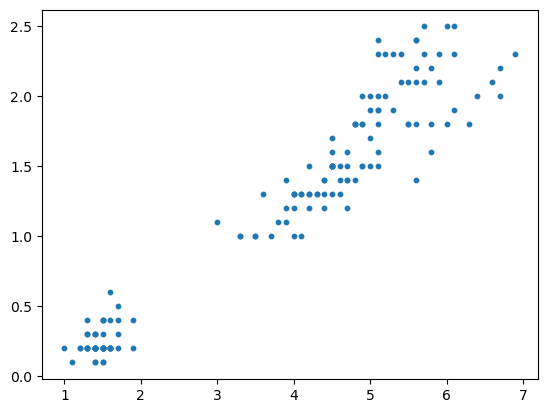

In [39]:
plt.scatter(df[['petal length (cm)']],df[['petal width (cm)']],s=10)

In [18]:
import warnings
warnings.filterwarnings("ignore")

In [23]:
k_rng = range(1,10)
sse = []

In [24]:
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit_predict(df)
    sse.append(km.inertia_)

In [25]:
sse

[550.8953333333333,
 86.39021984551397,
 31.371358974358973,
 19.477123363965475,
 13.916908757908757,
 11.051428739411808,
 9.24493855178638,
 7.704049961861174,
 6.576538396386223]

Text(0, 0.5, 'SSE')

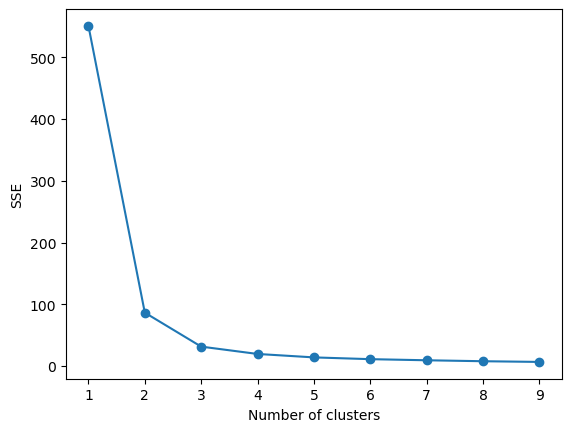

In [26]:
plt.scatter(k_rng, sse)
plt.plot(k_rng, sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

*Here **K=3** works the best*

In [27]:
k=3
km = KMeans(n_clusters=k)
y_predicted = km.fit_predict(df)

In [28]:
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [30]:
df['clusters'] = y_predicted
df.head()

,petal length (cm),petal width (cm),clusters
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [32]:
df1 = df[df.clusters==0]
df2 = df[df.clusters==2]
df3 = df[df.clusters==1]

In [33]:
cluster_center = km.cluster_centers_
cluster_center

array([[1.462     , 0.246     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

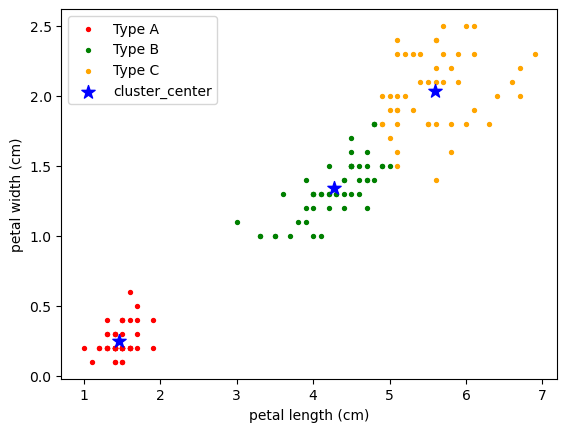

In [44]:
plt.scatter(df1[['petal length (cm)']],df1[['petal width (cm)']],s=8,color='red',label='Type A')
plt.scatter(df2[['petal length (cm)']],df2[['petal width (cm)']],s=8,color='green',label='Type B')
plt.scatter(df3[['petal length (cm)']],df3[['petal width (cm)']],s=8,color='orange',label='Type C')
plt.scatter(cluster_center[:,0],cluster_center[:,1],color='blue',marker='*',s=100,label='cluster_center')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()
plt.show()

*Here we find **3 clusters** of patterns from the **Iris** dataset*